>NOTE  
>When using dummy variables, always drop one category  

#### LABEL ENCODING
This is converting categorical features to numerical.  
Eg tall 0, medium 1, short 2
```python
# label encoding
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['species']= label_encoder.fit_transform(df['species']) 
```

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


In [80]:
# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
df['target'] = iris.target

# Map target numbers to species names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Drop the numeric 'target' column if it's not needed
df = df.drop('target', axis=1)

df['species'].unique()


['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [81]:
# label encoding
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['species']= label_encoder.fit_transform(df['species']) 

df['species'].unique() 


array([0, 1, 2])

#### ONE-HOT ENCODING
This is useful to avoid giving preference to female 1 more than male 0.  

|size  |cat value|age|
|------|---------|---|
|small |1        |12 |
|madium|2        |9  |
|large |3        |11 |

After one hot encoding these are the results:

|small|medium|large|age|
|-----|------|-----|---|
|1    |0     |0    |12 |
|0    |1     |0    |9  |
|0    |0     |1    |11 |

+ Using pandas  
+ Using sklearn  

> NOTE  
> If there are `n` categories in total, then `n` new features are created.

In [82]:
# Map target numbers to species names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [83]:
# OneHot necoding using pandas pd.get_dummies()
one_hot_encoded_data = pd.get_dummies(df, columns = ['species'])

one_hot_encoded_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [84]:
#Building a dummy employee dataset for example
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }

df2 = pd.DataFrame(data)
df2


,Employee id,Gender,Remarks
0,10,M,Good
1,20,F,Nice
2,15,F,Good
3,25,M,Great
4,30,F,Nice


In [85]:
# categorical columns, extract col names only not the df, convert the  col names to list
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df2[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# one_hot_df only includes the encoded columns, 5 i.e gf,gm,rg,rg,rn
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df2, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
df_encoded

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,0.0,1.0,1.0,0.0,0.0
1,20,1.0,0.0,0.0,0.0,1.0
2,15,1.0,0.0,1.0,0.0,0.0
3,25,0.0,1.0,0.0,1.0,0.0
4,30,1.0,0.0,0.0,0.0,1.0


#### DUMMY VARIABLE TRAP
>NOTE  
>When using dummy variables, always drop one category  
For eg, male and female will have perfect correlation.  
This is because if male is 0 then female is 1 and vice versa.  
There is perfect **multicollinearity—meaning** one dummy variable can be perfectly predicted by the others.  
This makes the model unstable and leads to issues in estimating the coefficients.

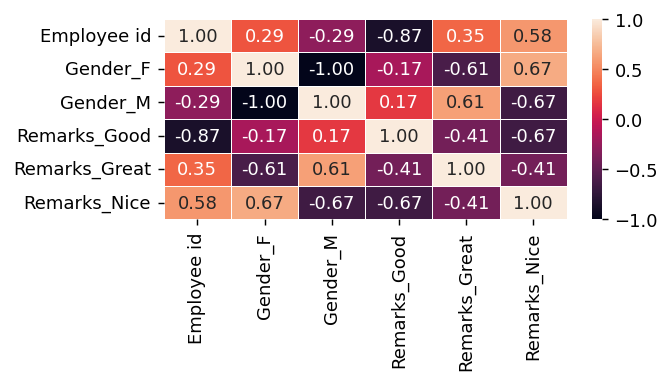

In [86]:
# Correlation with all dummy variables
corr = df_encoded.corr()
 
plt.figure(dpi=130, figsize=(5,2))
sns.heatmap(corr, annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.show()

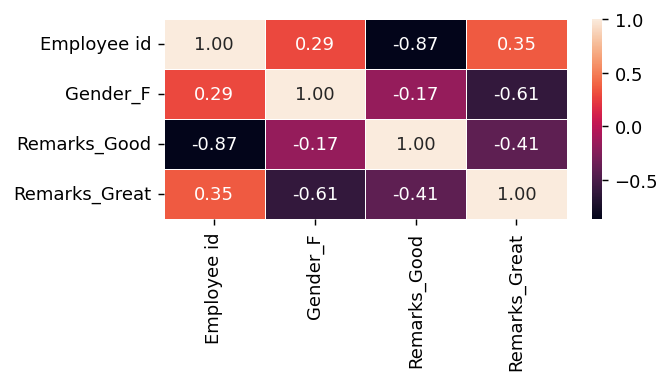

In [89]:
# Correlation without 1 dummy variable
df_encoded2 = df_encoded.drop(columns=['Gender_M', 'Remarks_Nice'], axis=1)

corr = df_encoded2.corr()
 
plt.figure(dpi=130, figsize=(5,2))
sns.heatmap(corr, annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.show()